In [407]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Here I'm loading all the datasets to see what data we can work with in our analysis

In [408]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df3 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', skiprows=[6])  # Skip line 7 (index 6)
df4 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', skiprows=[4], encoding='latin-1')  # Use 'latin-1' encoding
df6 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [409]:
#Let's explore the columns in each dataset before determining which ones to use.

print('df1',df1.columns)
print('df2',df2.columns)
print('df3',df3.columns)
print('df4',df4.columns)
print('df6',df6.columns)

df1 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
df2 Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
df3 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
df4 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')
df6 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


Given we want to analyse the financial successes of movies, popularity and genres, we will use df2, df3 and df6 as our main datasets. For now, let's start with df6 (tn.movie_budgets.csv.gz) to profitability and budgets.


In [410]:
df6['movie'].head()

# Checking for missing values in 'domestic_gross' df6

df6_na = df6['domestic_gross'].isna()
df6_missing = df6_na.sum()

# Checking the data types of 'domestic_gross' in and df6 in case we need to convert any data.
print('df6 domestic_gross dtype = ', df6['domestic_gross'].dtype)


# Let's print a few sample values for analysis
df6['domestic_gross'].head()
df1['domestic_gross'].head()

print(f'missing values in df6 = {df6_missing}')
 

df6 domestic_gross dtype =  object
missing values in df6 = 0


There are no missing values in the domestic_gross column in df6, which is excellent.

The domestic_gross datatype however is an object which is not ideal for measuring financial success. Let's look at what is preventing this from being a completely numerical set of data. We can do this by looking at a small section of the data.

In [411]:
df6['domestic_gross'].head

<bound method NDFrame.head of 0       $760,507,625
1       $241,063,875
2        $42,762,350
3       $459,005,868
4       $620,181,382
            ...     
5777              $0
5778         $48,482
5779          $1,338
5780              $0
5781        $181,041
Name: domestic_gross, Length: 5782, dtype: object>

Upon looking at some sample values, it looks like the dollar signs '$' and commas ',' are preventing this column to contain completely numerical data. We will need to remove these and convert this into numeric type.

In [412]:
#Convert 'domestic_gross' in df6 to a numerical format by removing dollar sign and commas, then converting to integer.
df6['domestic_gross_num'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)

#Identify movies with the highest domestic gross in df6
top_domestic_gross_df6 = df6.nlargest(5, 'domestic_gross_num')

print ('df6 top 5 ', top_domestic_gross_df6)


df6 top 5      id  release_date                                 movie production_budget  \
5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens      $306,000,000   
0    1  Dec 18, 2009                                Avatar      $425,000,000   
41  42  Feb 16, 2018                         Black Panther      $200,000,000   
6    7  Apr 27, 2018                Avengers: Infinity War      $300,000,000   
42  43  Dec 19, 1997                               Titanic      $200,000,000   

   domestic_gross worldwide_gross  domestic_gross_num  
5    $936,662,225  $2,053,311,220           936662225  
0    $760,507,625  $2,776,345,279           760507625  
41   $700,059,566  $1,348,258,224           700059566  
6    $678,815,482  $2,048,134,200           678815482  
42   $659,363,944  $2,208,208,395           659363944  


The top 5 highest domestic_grossing movies in df6 are:
Star Wars Ep. VII: The Force Awakens,
Avatar,
Black Panther,
Avengers: Infinity War,
Titanic.

In [413]:
# Summing up the domestic gross for all movies in each year in df1 and df6. As there is no year column in df6, we will need to use release date and rename the column for consistency.
domestic_gross_yearly_df6 = df6.groupby(df6['release_date'].str[-4:].astype(int))['domestic_gross_num'].sum().reset_index()
domestic_gross_yearly_df6.columns = ['year', 'domestic_gross_num']

# Identifying the year with the highest total domestic gross in df1 and df6
top_domestic_year_df6 = domestic_gross_yearly_df6.loc[domestic_gross_yearly_df6['domestic_gross_num'].idxmax()]

print(top_domestic_year_df6)


year                         2016
domestic_gross_num    11042828402
Name: 91, dtype: int64


Let's move onto the next part of our analysis, which is analysing the worldwide_gross in df6.

In [414]:
# Check for missing values in 'worldwide_gross' df6
print(f'There are {df6["worldwide_gross"].isna().sum()} missing values in df6')

# Checking the data types of 'foreign_gross' in df1 and 'worldwide_gross' in df6
print(f'df6 worldwide_gross dtype is {df6["worldwide_gross"].dtype}')

# If df6['worldwide_gross'] is not a float or int, we need to clean it
print(f'df6 first 5 values {df6["worldwide_gross"].head()}')


There are 0 missing values in df6
df6 worldwide_gross dtype is object
df6 first 5 values 0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object


There are 0 missing values in df6 ['worldwide_gross'].
The df6 data type is an object, which includes commas and dollar signs, which we'll need to remove as we have previously.

In [415]:
# For df6['worldwide_gross'], removing dollar signs and commas, then converting to integer
df6['worldwide_gross_num'] = df6['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# We should now be able to identify movies with the highest worldwide gross in both datasets
top_worldwide_gross_df6 = df6.nlargest(5, 'worldwide_gross_num')

print(top_worldwide_gross_df6)

    id  release_date                                 movie production_budget  \
0    1  Dec 18, 2009                                Avatar      $425,000,000   
42  43  Dec 19, 1997                               Titanic      $200,000,000   
5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens      $306,000,000   
6    7  Apr 27, 2018                Avengers: Infinity War      $300,000,000   
33  34  Jun 12, 2015                        Jurassic World      $215,000,000   

   domestic_gross worldwide_gross  domestic_gross_num  worldwide_gross_num  
0    $760,507,625  $2,776,345,279           760507625         2.776345e+09  
42   $659,363,944  $2,208,208,395           659363944         2.208208e+09  
5    $936,662,225  $2,053,311,220           936662225         2.053311e+09  
6    $678,815,482  $2,048,134,200           678815482         2.048134e+09  
33   $652,270,625  $1,648,854,864           652270625         1.648855e+09  


It's interesting to note that it is unclear whether 'worldwide_gross' includes both domestic and foreign values, or if it just contains foreign values. Looking at the df1 columns, there is a clear differentiation between how much was made domestically and globally with the column names 'domestic_gross' and 'foreign_gross'.

To ensure we are only looking foreign values, let's subtract 'domestic_gross' from 'worldwide_gross' and compare the values with df1's 'foreign_gross'

In [416]:
#Summing up the worldwide gross for all movies in each year in df6 and subtracting the domestic gross to estimate the foreign gross
df6['foreign_gross_est'] = df6['worldwide_gross_num'] - df6['domestic_gross_num']
foreign_gross_est_year = df6.groupby(df6['release_date'].str[-4:].astype(int))['foreign_gross_est'].sum().reset_index()
foreign_gross_est_year.columns = ['year', 'foreign_gross']

# Identifying the year with the highest total foreign gross in df1 and df6
top_foreign_year_df6 = foreign_gross_est_year.loc[foreign_gross_est_year['foreign_gross'].idxmax()]

top_foreign_year_df6

year             2.017000e+03
foreign_gross    1.797623e+10
Name: 92, dtype: float64

In df6 the year 2017 yielded the highest grossing films internationally with foreign_gross equalling to 17.98 billion.

Let's now compare these figures with df1 to see if they're accurate

In [417]:
df1_6 =  pd.merge(df1, df6, left_on='title', right_on='movie', how='inner')
df1_6.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'domestic_gross_num', 'worldwide_gross_num',
       'foreign_gross_est'],
      dtype='object')

Now we want to check the columns of both datasets to ensure the financials we're using for df6 are accurate. To do this, we'll compare a movie that is in both datasets - "Black Panther".

In [418]:
# Filter the merged DataFrame for 'Black Panther'
black_panther_data = df1_6[df1_6['title'] == 'Black Panther']

# Check if 'Black Panther' exists in the merged DataFrame
if not black_panther_data.empty:
    # Extract the financial information from df1_6
    domestic_gross = black_panther_data['domestic_gross_x'].values[0]
    foreign_gross = black_panther_data['foreign_gross'].values[0]
    
    print(f"Domestic Gross for 'Black Panther' in df1_6: ${domestic_gross}")
    print(f"Foreign Gross for 'Black Panther' in df1_6: ${foreign_gross}")
else:
    print("'Black Panther' is not found in the merged DataFrame.")

#Let's compare this to our original findings for Black Panther in df6

df_6_black_panther = df6[df6['movie'] == 'Black Panther']

if not df_6_black_panther.empty:
    domestic_gross_df6 = df_6_black_panther['domestic_gross_num'].values[0]
    foreign_gross_df6 = df_6_black_panther['foreign_gross_est'].values[0]
    
    print(f"Domestic Gross for 'Black Panther' in df6: ${domestic_gross_df6}")
    print(f"Worldwide Gross for 'Black Panther' in df6: ${foreign_gross_df6}")
else:
    print("'Black Panther' is not found in df6.")


Domestic Gross for 'Black Panther' in df1_6: $700100000.0
Foreign Gross for 'Black Panther' in df1_6: $646900000
Domestic Gross for 'Black Panther' in df6: $700059566
Worldwide Gross for 'Black Panther' in df6: $648198658.0


The results show that for both df1 and df6, the figures are quite similar. Similarly, we can confirm that the worldwide_gross column in df6 did actually include both domestic and foreign values, as the foreign_gross_est, which we calculated above show a similar figure to df1's foreign_gross.

The discrepancy in figures could be due to different time periods when this data was captured

Let's now look at which genres were the most successful in df3

In [419]:
# Check for missing values in 'genre' of df3
print('There are ', df3['genre'].isna().sum(), 'missing genres from df3')

# Checking the data type of 'genre' in df3
print('The dtype of the genre column in df3 is', df3['genre'].dtype)

# Extracting and expanding the genres, as some movies are categorized under multiple genres
df3['genre_list'] = df3['genre'].str.split('|')
df3_split = df3.explode('genre_list')

#Lets calculate the distribution of movies across different genres
genre_distribution_df3 = df3_split['genre_list'].value_counts(normalize=False)

print (genre_distribution_df3.head(10))  # Displaying top 10 genres for simplicity


There are  8 missing genres from df3
The dtype of the genre column in df3 is object
Drama                          911
Comedy                         550
Action and Adventure           366
Mystery and Suspense           309
Art House and International    265
Romance                        198
Classics                       193
Science Fiction and Fantasy    172
Horror                         134
Musical and Performing Arts     98
Name: genre_list, dtype: int64


The data above suggests that Drama, Comedy or Drama & Comedy tend to be the most common genres in df3. Unfortunately I am unable to find a common ID to merge df6 with df3. If I was able to find one, I would do an analysis on which genre is the most profitable to produce movies. Instead, let's do a profitability analysis of whether a higher production budget indicates a higher overall revenue.

In [420]:
# Convert financial columns to numeric
df6['production_budget_num'] = df6['production_budget'].replace('[\$,]', '', regex=True).astype(int)
df6['domestic_gross_num'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)

# # Calculate Net Revenue
df6['net_domestic_revenue'] = df6['domestic_gross_num'] - df6['production_budget_num']
df6['net_worldwide_revenue'] = df6['foreign_gross_est'] - df6['production_budget_num']

# # Analyzing the films with the highest net revenues
top_net_domestic = df6.nlargest(5, 'net_domestic_revenue')[['movie', 'net_domestic_revenue']]
top_net_worldwide = df6.nlargest(5, 'net_worldwide_revenue')[['movie', 'net_worldwide_revenue']]

print(f'The top net domestic revenue is {top_net_domestic}')
print(f'The top net worldwide revenue is {top_net_worldwide}')


The top net domestic revenue is                                      movie  net_domestic_revenue
5     Star Wars Ep. VII: The Force Awakens             630662225
41                           Black Panther             500059566
42                                 Titanic             459363944
3464          Star Wars Ep. IV: A New Hope             449998007
33                          Jurassic World             437270625
The top net worldwide revenue is                                              movie  net_worldwide_revenue
0                                           Avatar           1.590838e+09
42                                         Titanic           1.348844e+09
6                           Avengers: Infinity War           1.069319e+09
66                                       Furious 7           9.757158e+08
260  Harry Potter and the Deathly Hallows: Part II           8.355000e+08


Here are the films with the highest net revenues:


Domestic Net Revenue:

Star Wars Ep. VII: The Force Awakens,
Black Panther,
Titanic,
Star Wars Ep. IV: A New Hope,
Jurassic World.


Worldwide Net Revenue:

Avatar,
Titanic,
Avengers: Infinity War,
Star Wars Ep. VII: The Force Awakens,
Jurassic World.

Now that we know that our domestic_gross and foreign_gross_est can be relied upon for data analysis, let's look at the relationship between production budgets and the revenue generated to see if there is any correlation.

In [421]:
# Calculating the correlation coefficients
correlation_net_domestic = df6['production_budget_num'].corr(df6['net_domestic_revenue'])
correlation_net_worldwide = df6['production_budget_num'].corr(df6['net_worldwide_revenue'])

correlation_net_domestic, correlation_net_worldwide

(0.09974209165512304, 0.4858291792513912)

The correlation coefficient between production budget and net domestic revenue is approximately 0.09. If we round this up to 0.01, it still indicates a very weak and almost no correlation between production budget and the net revenue generated domestically.

On the other hand, the correlation coefficient between production budget and net worldwide revenue is approximately 0.48, suggesting a stronger yet still not very strong positive correlation for the domestic and foreign markets combined.

This implies that while there’s a moderately positive relationship between production budget and worldwide financial success, the relationship is much weaker when looking at domestic financial success alone. 

If we can assume that most films will be released internationally, Microsoft may still likely see some net profit the higher the production cost is.

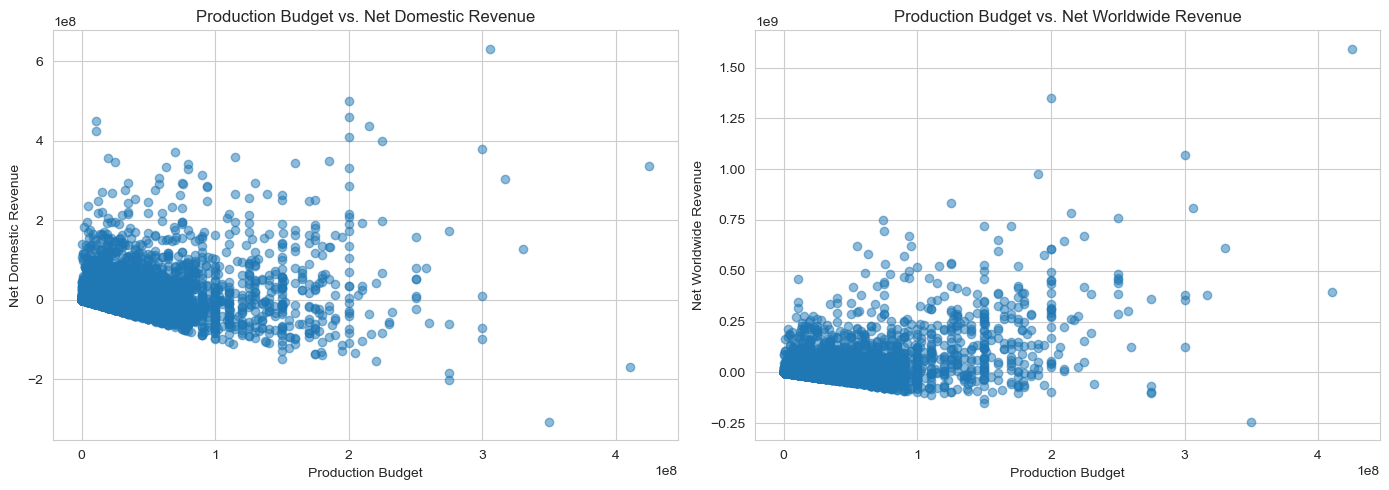

In [422]:
# Visualise the data by creating a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the scatter plot for Production Budget vs. Net Domestic Revenue
ax[0].scatter(df6['production_budget_num'], df6['net_domestic_revenue'], alpha=0.5)
ax[0].set_title('Production Budget vs. Net Domestic Revenue')
ax[0].set_xlabel('Production Budget')
ax[0].set_ylabel('Net Domestic Revenue')

# Plotting the scatter plot for Production Budget vs. Net Worldwide Revenue
ax[1].scatter(df6['production_budget_num'], df6['net_worldwide_revenue'], alpha=0.5)
ax[1].set_title('Production Budget vs. Net Worldwide Revenue')
ax[1].set_xlabel('Production Budget')
ax[1].set_ylabel('Net Worldwide Revenue')

# Adjust layout to fit properly
plt.tight_layout()
plt.show()

It may be interesting to whether there's a relationship between the average popularity of a film and its release date. We can find all this data in df2 and will order them in chronological order.

In [423]:
# Convert 'release_date' to datetime format
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')

# Extract month name from the 'release_date' and create a new column 'release_month'
df2['release_month'] = df2['release_date'].dt.strftime('%B')

# Group by 'release_month' and calculate mean popularity
month_group = df2.groupby('release_month')['popularity'].mean().reset_index()

# Sort the months by mean popularity in descending order and reset the index
month_group = month_group.sort_values(by='popularity', ascending=False).reset_index(drop=True)

# Specify the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']



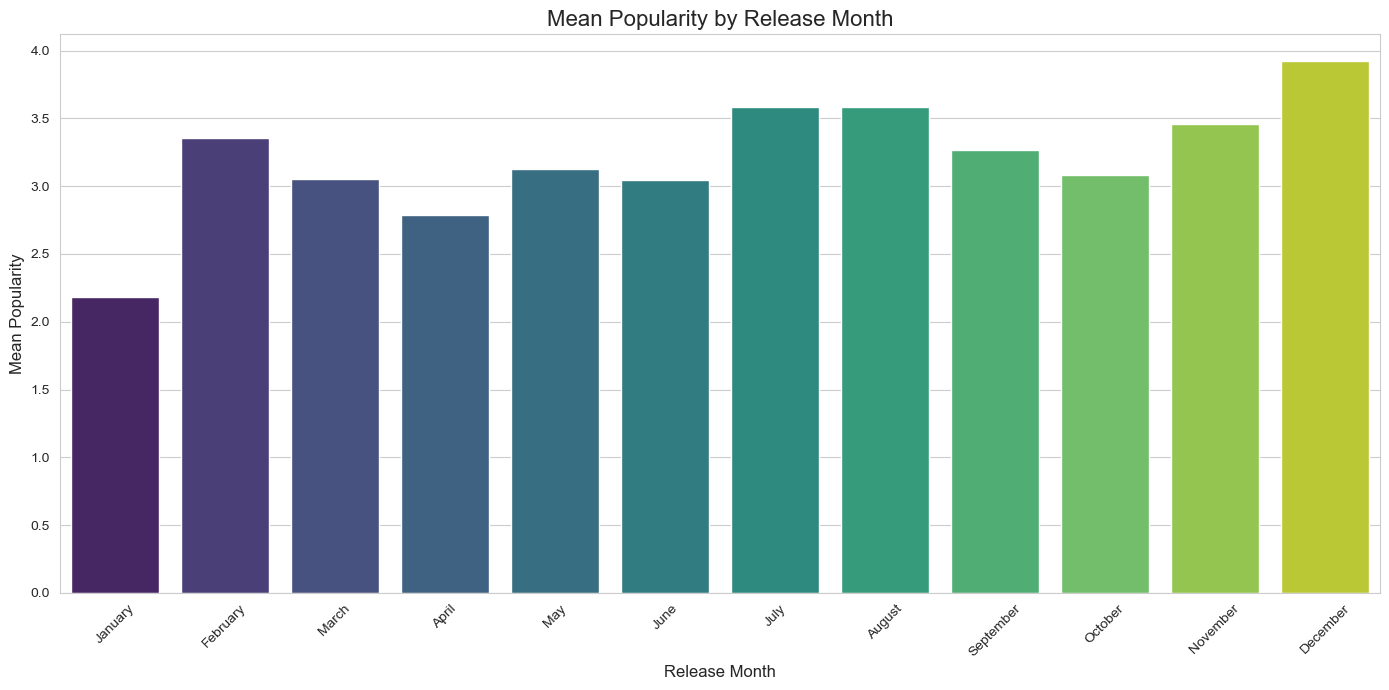

In [424]:
# Plotting mean popularity by release month for all months, in chronological order
plt.figure(figsize=(14, 7))
sns.barplot(data=month_group, x='release_month', y='popularity', palette='viridis', order=month_order)
plt.title('Mean Popularity by Release Month', fontsize=16)
plt.ylabel('Mean Popularity', fontsize=12)
plt.xlabel('Release Month', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From here we can see that the most popular month on average to release films are December, July, August, November.

In [450]:
# Using 'original_title' from df2 and 'movie' from df6 as keys
merged_df_26 = pd.merge(df2, df6, left_on='original_title', right_on='movie', how='inner')


merged_df_26[['popularity', 'vote_average']].apply(pd.to_numeric, errors='coerce')

# Calculate correlations between popularity, vote_average, and net revenue
correlation_metrics = ['popularity', 'vote_average', 'net_worldwide_revenue']
correlations = merged_df_26[correlation_metrics].corr()

print(correlations)


                       popularity  vote_average  net_worldwide_revenue
popularity               1.000000      0.308586               0.486690
vote_average             0.308586      1.000000               0.180947
net_worldwide_revenue    0.486690      0.180947               1.000000


Overall, this shows that there is a very strong positive correlation between the production budget and popularity. Essentially, the higher the cost, the more popular the film will be.

Likewise there is a strong correlation between net revenue and the popularity of a film.

In [448]:
# merged_df_26.columns

# pd.to_numeric(merged_df_26['production_budget_num'])

# #Calculate Correlations
# corr_budget = merged_df_26['popularity'].corr(merged_df_26['production_budget_num'])
# corr_worldwide = merged_df_26['popularity'].corr(merged_df_26['foreign_gross_est'])
# corr_popularity_net = merged_df_26['popularity'].corr(merged_df_26['net_worldwide_revenue'])


# # Print calculated correlations
# print(f"Correlation between Popularity and Production Budget: {corr_budget:.2f}")
# print(f"Correlation between Popularity and Worldwide Gross: {corr_worldwide:.2f}")
# print(f"Correlation between Popularity and Net Revenue: {corr_popularity_net:.2f}")

                       popularity  vote_average  net_worldwide_revenue
popularity               1.000000      0.308586               0.486690
vote_average             0.308586      1.000000               0.180947
net_worldwide_revenue    0.486690      0.180947               1.000000


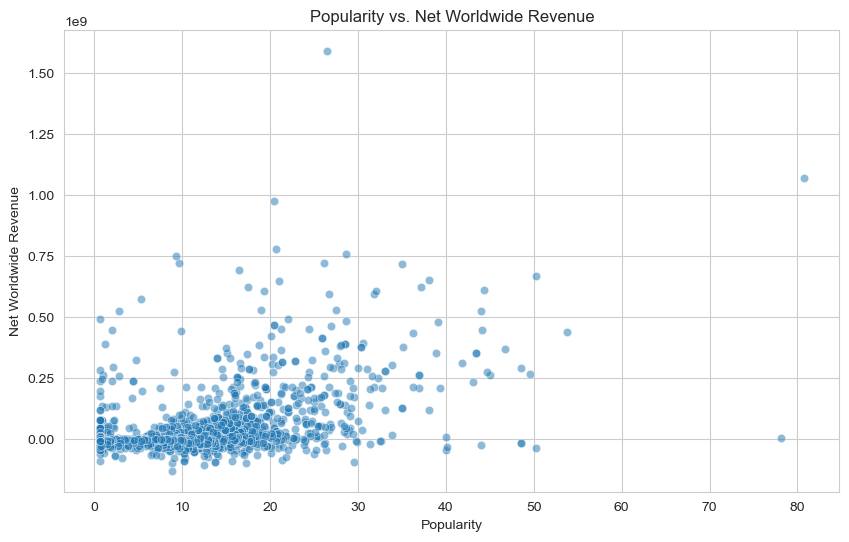

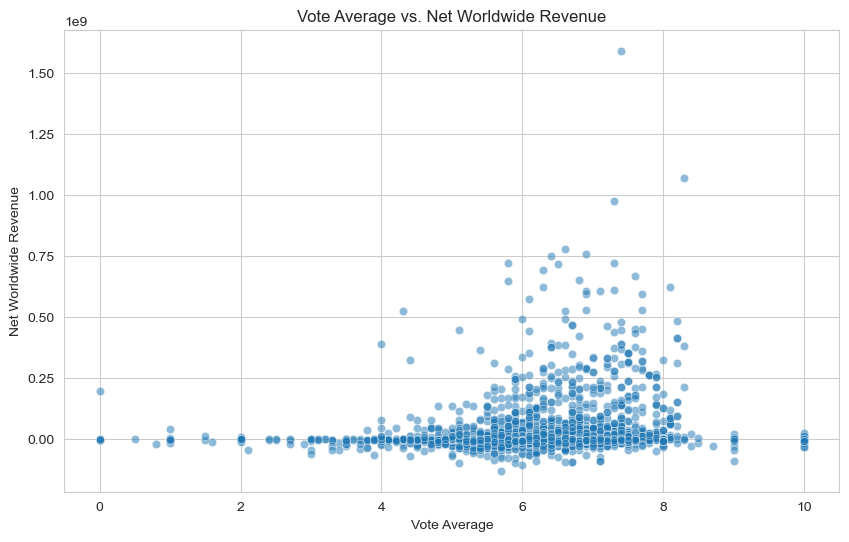

In [447]:

# Scatter plot to visualize the relationship between popularity and net worldwide revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_26, x='popularity', y='net_worldwide_revenue', alpha=0.5)
plt.title('Popularity vs. Net Worldwide Revenue')
plt.xlabel('Popularity')
plt.ylabel('Net Worldwide Revenue')
plt.show()

# Scatter plot to visualize the relationship between vote_average and net worldwide revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_26, x='vote_average', y='net_worldwide_revenue', alpha=0.5)
plt.title('Vote Average vs. Net Worldwide Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Net Worldwide Revenue')
plt.show()

